In [1]:
import sys
sys.path.append('../')  


# import os
# import sys

# script_directory = os.path.dirname(os.path.realpath(__file__))
# project_root = os.path.join(script_directory, '..')
# sys.path.append(project_root)


[5.37369647e-04 3.14934717e-05 1.22814419e-05 8.38942230e-06]


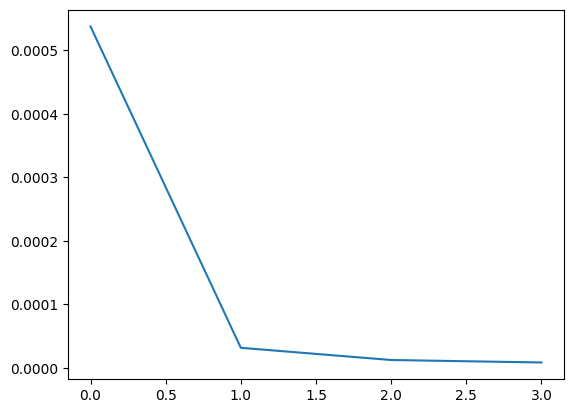

In [2]:
import numpy as np
import matplotlib.pyplot as plt
loss = np.load(r'C:\Users\dhruv\Desktop\680Final\loss.pth.npy')
print(loss)
plt.plot(loss)

In [3]:
import src.utils
import trimesh

pclUtils = src.utils.pointCloudUtils()
meshfile = r"C:\Users\dhruv\Desktop\680Final\data\CADmodels\006_mustard_bottle\textured.ply"
mesh = trimesh.load(meshfile)
pointcloud = pclUtils.toOpen3dCloud(mesh.vertices).voxel_down_sample(voxel_size = 0.005).points
# pointcloud.requires_grad = True


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
import numpy as np
import torch

diffPts = torch.tensor(np.asarray(pointcloud))

In [5]:
diffPts.requires_grad = True

In [6]:
diffPts.requires_grad
print(diffPts.grad_fn)


None
